# 泰坦尼克号—生还几率与(客舱等级、性别、年纪)的关系调查分析


## 一、准备工作
从 https://www.kaggle.com/c/titanic/data 获取样本数据集

## 二、分析简介
此数据仅仅包含泰坦尼克号上 2224 名乘客和船员中的 891 名的数据
### 分析目标
生还几率与(客舱等级、性别、年纪)的关系

## 三、样本数据初始化
### 1.加载样本数据

In [1]:
# -*- coding: utf-8 -*- 

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# 读取原始数据    
original_data = pd.read_csv("titanic-data.csv");
print('共计12个变量:')
original_data.info()


共计12个变量:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 2. 样本变量与数据字典

Age | Cabin | Embarked | Fare | Name | Parch | PassengerId | Pclass | Sex | SibSp | Survived | Ticket
----|----|----|----|----| ----| ----| ----|----| ----|----|----|
年龄| 舱号 |出发港|票价|姓名| 同行的父母/孩子（人数） | 乘客ID | 舱等 |性别| 同行的兄弟姐妹/配偶（人数） | 是否生还 | 票号

港口 |
----|----|----|
C = Cherbourg | Q = Queenstown | S = Southampton |

生还 |
----|----|
0 = 未生还 | 1 = 生还


### 3.样本数据清理
数据清洗主要是删除原始数据中的无关数据、重复数据，平滑噪声数据，筛选掉与主题无关的数据，处理异常值、缺失值等。

#### 3.1.剔除不需要的变量

In [2]:
#只运行一次
print('只保留所需的4个变量:')
original_data.drop('PassengerId', axis=1, inplace=True)
original_data.drop('Name', axis=1, inplace=True)
original_data.drop('SibSp', axis=1, inplace=True)
original_data.drop('Parch', axis=1, inplace=True)
original_data.drop('Ticket', axis=1, inplace=True)
original_data.drop('Fare', axis=1, inplace=True)
original_data.drop('Cabin', axis=1, inplace=True)
original_data.drop('Embarked', axis=1, inplace=True)
original_data.info()


只保留所需的4个变量:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [3]:
null_sum = original_data.isnull().sum() #检验是否有缺失值
print(null_sum)
print('由上述得知，年纪缺失177条记录')

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64
由上述得知，年纪缺失177条记录


##### 3.2.对缺失的字段记录（年纪）进行处理

In [4]:
# Age
# age_data = original_data[['Age','Survived']]
# age_is_null = pd.isnull(age_data['Age'])
# age_data_without_null = age_data[age_is_null == False]
#print(age_data_without_null)
age_mean=original_data['Age'].mean()
original_data['Age']=original_data['Age'].fillna(age_mean)
age_data_without_null=original_data

#### 3.3.不同年龄分段处理

In [5]:

# #年龄数据进行处理，0～6为儿童，7～16 少年，16~25青年 25～34壮年 35~50中年 50+老年
# def age_duan(age):
#     if age<=6:
#         return 6
#     elif age<=16:
#         return 16
#     elif age<=25:
#         return 25
#     elif age<=34:
#         return 34
#     elif age<=50:
#         return 50
#     else:
#         return 100
    
# original_data['Age']=original_data['Age'].apply(lambda x:age_duan(x))

## 四、单因素分析
### >>样本生还人数与比例

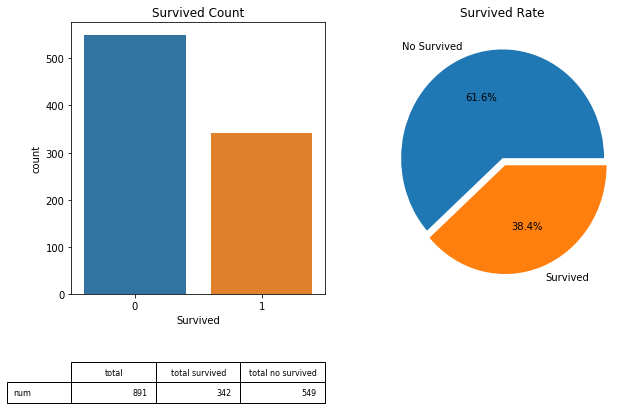

In [6]:
#总人数
total_num = len(original_data);
#总生还人数
total_survived_num = original_data['Survived'].sum()
#总未生还人数
total_no_survived_num = total_num - total_survived_num

# 图表
plt.figure(figsize = (10,5))
plt.subplot(121)
# 柱状图
sns.countplot(x='Survived', data=original_data)
#table
table_vals = [[total_num,total_survived_num,total_no_survived_num]]
col_labels = ['total','total survived','total no survived']
row_labels = ['num']
table=plt.table(cellText=table_vals,
      rowLabels=row_labels,
      colLabels=col_labels,colWidths=[0.1]*3,
      loc='bottom',bbox=[0, -0.4, 1, 0.15])
table.set_fontsize(24)
table.scale(10, 10)

plt.title('Survived Count')

plt.subplot(122)
explode = (0,0.07)
plt.pie([total_no_survived_num, total_survived_num],labels=['No Survived','Survived'],explode= explode,autopct='%1.1f%%')
plt.title('Survived Rate') 

plt.show()

#### 左侧图形（Survived Count）表示：
在样本数据中，总样本人数为891，其中生还人数342，未生还人数549
#### 右侧图形（Survived Rate）表示：
在样本数据中，生还人数占总体人数的38.4%，未生还人数占总样本人数的的61.6%

### >>年纪对生还率的影响？
当前样本数据中已经剔除空值的数据，其样本量为714

### 1.1 年纪的分布

29.6991176471


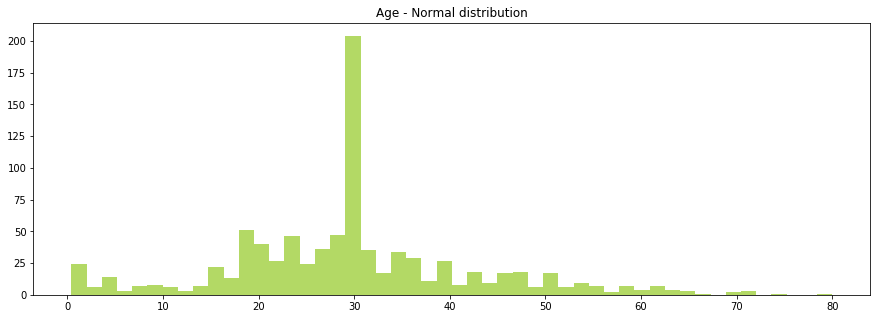

In [17]:
#print(len(age_data_without_null))
# 平均年纪（去掉空值的数据）
# 等同于 mean_age age_data.mean() 类库会自动过滤掉空值
mean_age = age_data_without_null['Age'].mean()
print(mean_age)

#高斯分布 （正态分布） 
fig,ax0 = plt.subplots(nrows=1,figsize=(15,5))  

#第二个参数是柱子宽一些还是窄一些，越大越窄越密  
ax0.hist(age_data_without_null['Age'],50,histtype='bar',facecolor='yellowgreen',alpha=0.75)  
##pdf概率分布图  
ax0.set_title('Age - Normal distribution')
# age_data_without_null.groupby(['Age']).count().unstack().plot(kind='bar',stacked='true')
# ax1.hist(age_data_without_null,50,normed=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)  
# #cdf累计概率函数
# ax1.set_title("age - cdf")
# fig.subplots_adjust(hspace=0.4)
plt.show()

#### 上图可知：
样本中年纪的分布于20～34岁

### 1.2.年纪与生存率

/Users/dongyan/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


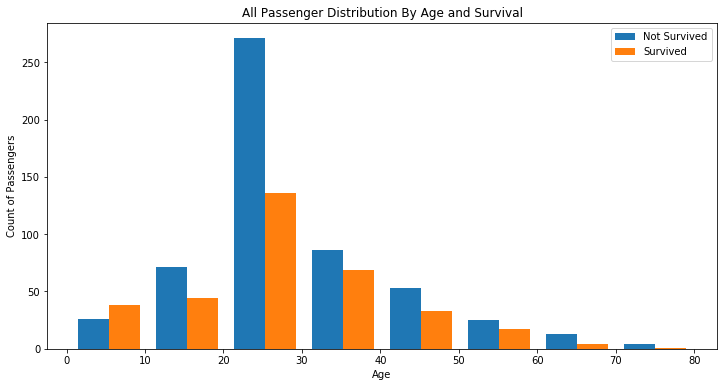

In [8]:
#print(age_data_without_null)
#age_data_without_null.groupby(['Age','Survived'])['Survived'].count().unstack().plot.bar(stacked=True,figsize=(20,10));

# extract age data of survived and non-survived groups
age_not_survived = age_data_without_null[age_data_without_null.Survived == 0].Age
age_survived = age_data_without_null[age_data_without_null.Survived == 1].Age

# make a grouped histogram
plt.figure(figsize=(12, 6))
plt.hist([age_not_survived, age_survived], stacked=False, bins=8)
plt.title('All Passenger Distribution By Age and Survival')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.legend(['Not Survived', 'Survived'])

### 上图可知
30岁～40岁的生还率都最高
60岁以上生还率较低

## >>性别对生还率的影响？
### 性别与生还率

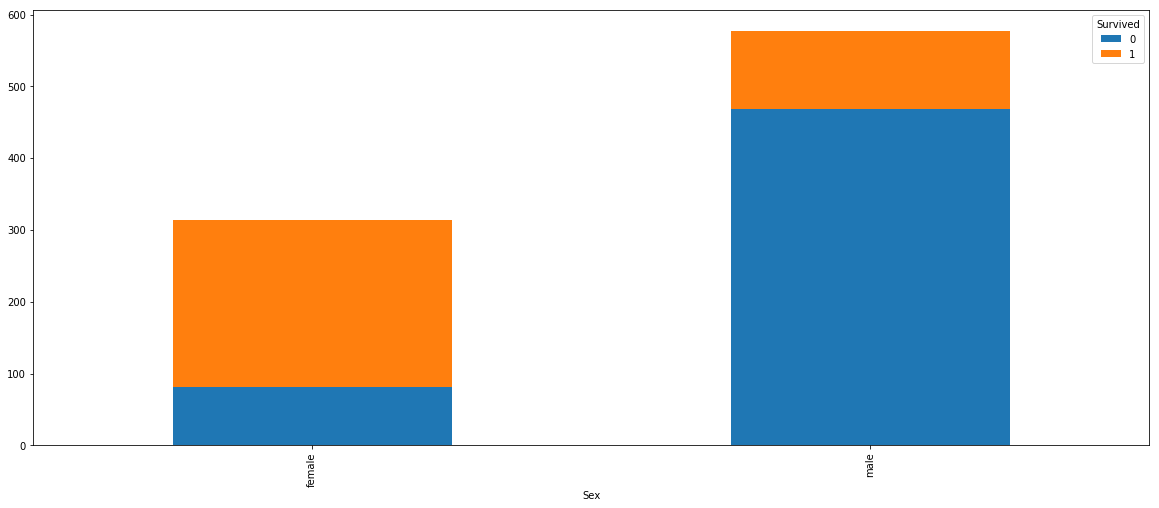

In [9]:
original_data.groupby(['Sex','Survived'])['Survived'].count().unstack().plot.bar(stacked=True,figsize=(20,8));

#### 有上图可知
女性的生还率要大于男性生还率

## >>不同客舱等级对生还率是否影响？

Text(0.5,1,u'Count across Pclass')

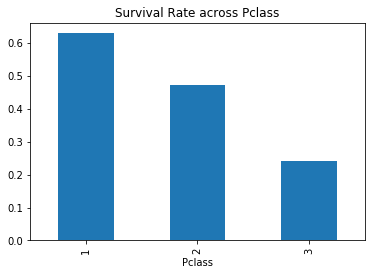

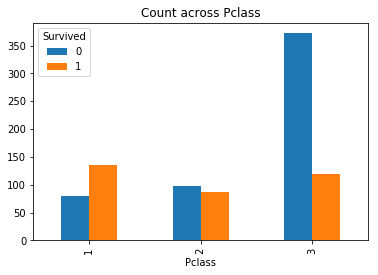

In [10]:
original_data.groupby(['Pclass'])['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate across Pclass')

original_data.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.title('Count across Pclass')

#### 上图可知：
客舱等级的生还率为：1 > 2 > 3

## 五、多因素分析

In [12]:
#age_is_null = pd.isnull(age_data['Age'])
# original_data = original_data[age_is_null == False]
# print(len(original_data))

### 性别和客舱等级共同对生还率的影响

Text(0.5,1,u'Survival Rate across Pclass and Sex')

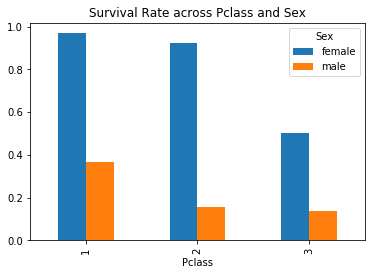

In [13]:
original_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survival Rate across Pclass and Sex')

#### 上图所示，对生还率的影响
+ 性别>客舱等级，
+ 其次是客舱等级对生还率的影响是1>2>3

### 性别和年纪对生还率的影响

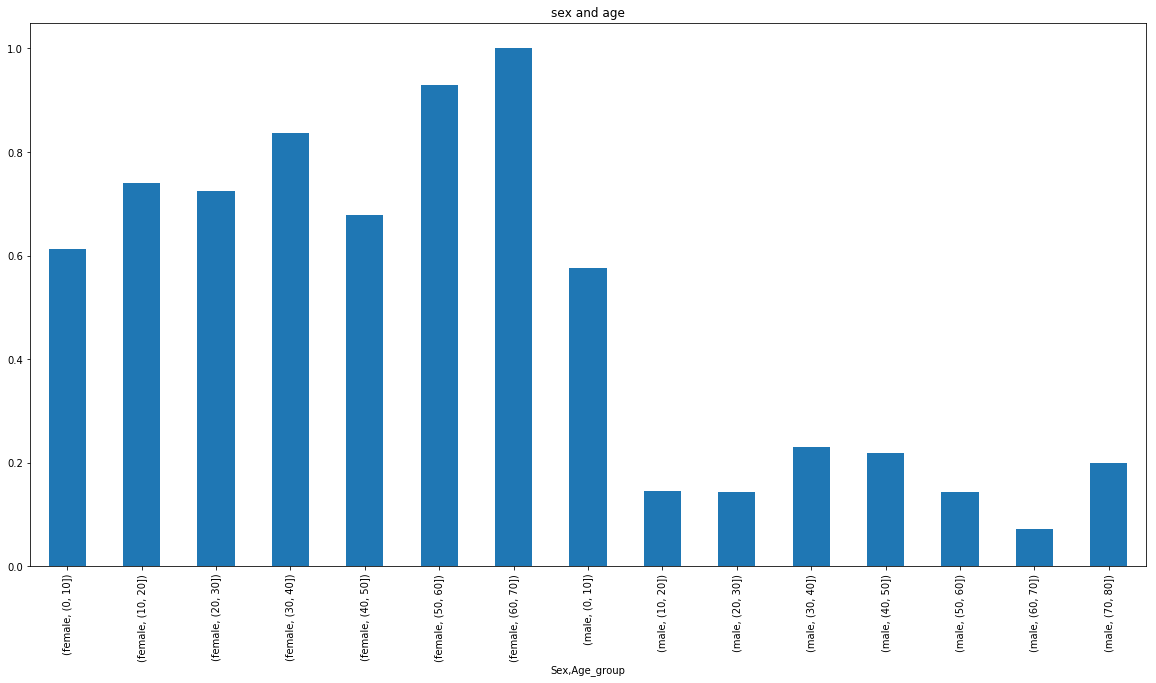

In [26]:
bins=np.arange(0,90,10)
original_data['Age_group'] = pd.cut(original_data['Age'], bins)
# print(original_data['Age_group'])
sex_age_data=original_data[['Age_group','Sex']]
sex_age_Survived_data=original_data[['Age_group','Sex']][original_data['Survived']==1]

#每组生还者的人数
sex_age_groupby_survived=sex_age_Survived_data.groupby(['Sex','Age_group'])['Age_group'].count()
#每组的总人数
sex_age_groupby_survived_all=sex_age_data.groupby(['Sex','Age_group'])['Age_group'].count()

result= sex_age_groupby_survived/sex_age_groupby_survived_all
result.plot.bar(stacked=True,figsize=(20,10),title="sex and age");

#### 上图得知：
+ 对生还率影响大的是性别，女性>男性。
+ 年纪：0~10>30~50>50~80

### 年龄和乘客等级共同对生还率的影响

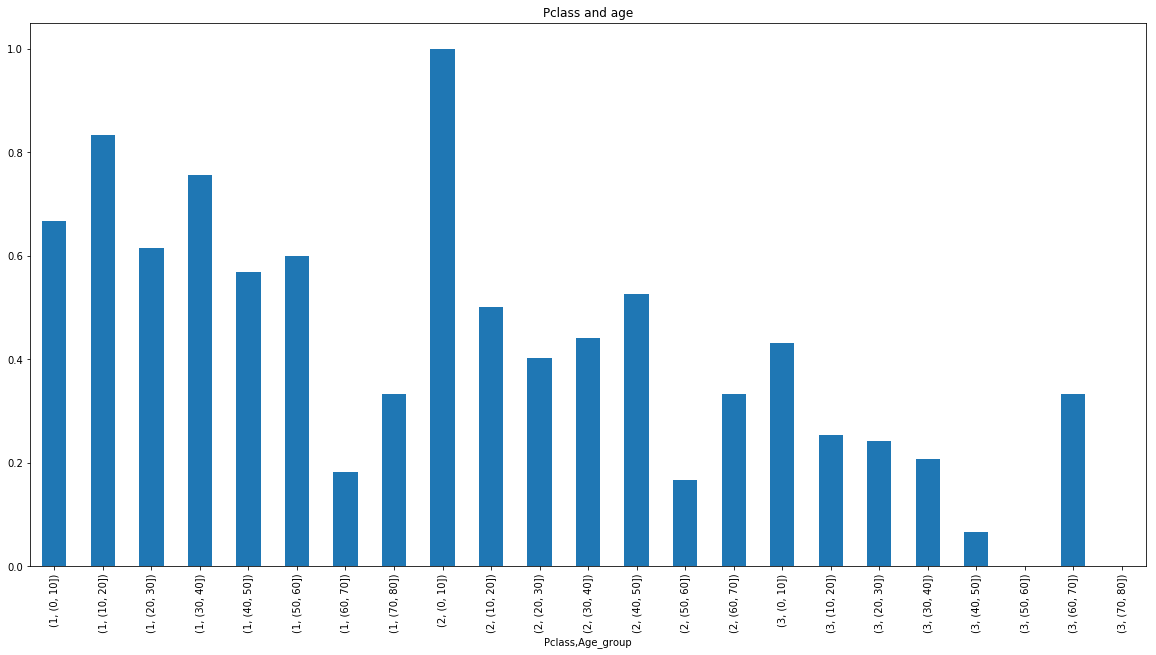

In [28]:
pclass_age_data=original_data[['Pclass','Age_group']]
pclass_age_Survived_data=original_data[['Pclass','Age_group']][original_data['Survived']==1]

#每组生还者的人数
pclass_age_groupby_survived=pclass_age_Survived_data.groupby(['Pclass','Age_group'])['Pclass'].count()
#每组的总人数
pclass_age_groupby_survived_all=pclass_age_data.groupby(['Pclass','Age_group'])['Pclass'].count()

result= pclass_age_groupby_survived/pclass_age_groupby_survived_all
result.plot.bar(stacked=True,figsize=(20,10),title="Pclass and age");

#### 上图所示：
+ 客舱等级对生还率的影响 > 年龄的影响
+ 年纪：0~10>30~50>50~80


## 六、结论
### 通过分析，可以看出对生还率影响最大的因素是乘客等级，其次是性别，最后年龄段也对生化率有影响

### 分析的局限性
这里并没有从统计上分析得出这些结果的偶然性，所以并不知道这里的结果是真正的差异造成的还是噪音造成的
年龄字段有一些缺失值，其中填入平均值作为缺省值，也会影响分析结果
结果的相关性
这里的数据并非通过试验得出，所以无法说自变量之间的因果性，只能说她们之间有相关性